Mean Squared Error: 0.04
R-squared Score: 0.94


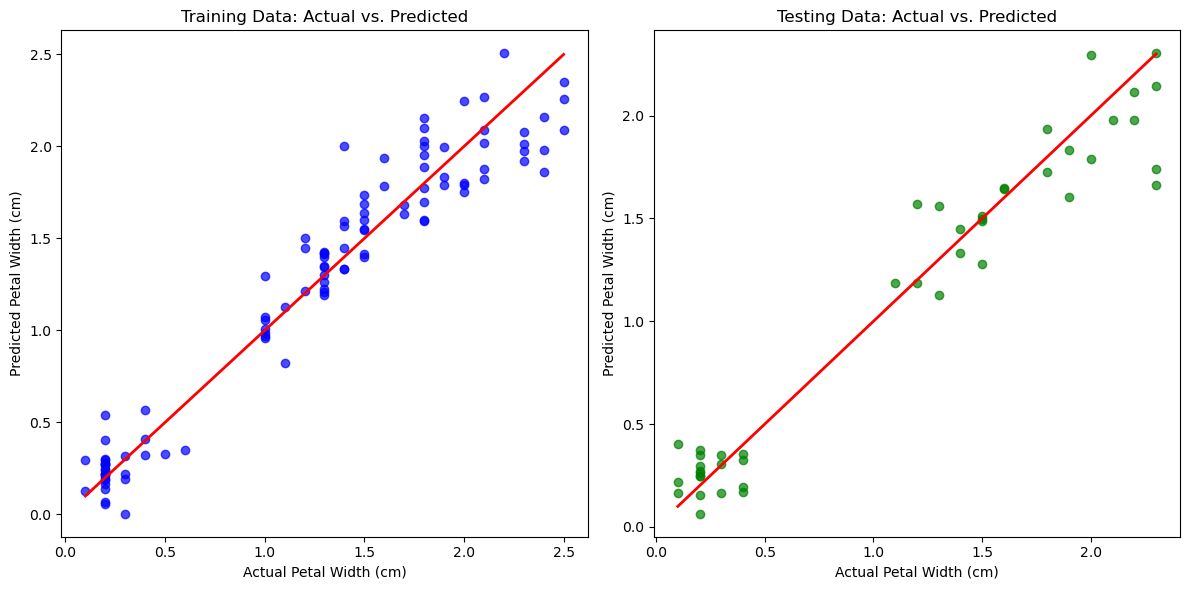

In [1]:
#Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression                        
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Features
y = X['petal width (cm)'] # Target: Petal Width
# Remove 'petal width (cm)' from the features to avoid leakage
X = X.drop(columns=['petal width (cm)'])

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Make predictions on the training and testing sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)
# Evaluate the model's performance on testing data
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Scatter plot: Actual vs. Predicted for Training Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
color='red', linewidth=2)
plt.xlabel('Actual Petal Width (cm)')
plt.ylabel('Predicted Petal Width (cm)')
plt.title('Training Data: Actual vs. Predicted')

# Scatter plot: Actual vs. Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
color='red', linewidth=2)
plt.xlabel('Actual Petal Width (cm)')
plt.ylabel('Predicted Petal Width (cm)')
plt.title('Testing Data: Actual vs. Predicted')
# Display the plots
plt.tight_layout()
plt.show()
